In [15]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('marketing.csv')

# Display the first five lines
print(df.head(25))


    Sq. Feet (in 000s)   Garage  Bedrooms  Price (in $000s)
0                 1000     none         2                65
1                 1100     none         2                73
2                 1150  one-car         2                85
3                 1400     none         3                87
4                 1700  one-car         3                98
5                 1800  one-car         4               105
6                 1900     none         3                95
7                 1900  one-car         4               125
8                 2100  two-car         4               125
9                 2100  two-car         4               137
10                2300  two-car         4               150


['Sq. Feet (in 000s)', 'Garage', 'Bedrooms', 'Price (in $000s)']


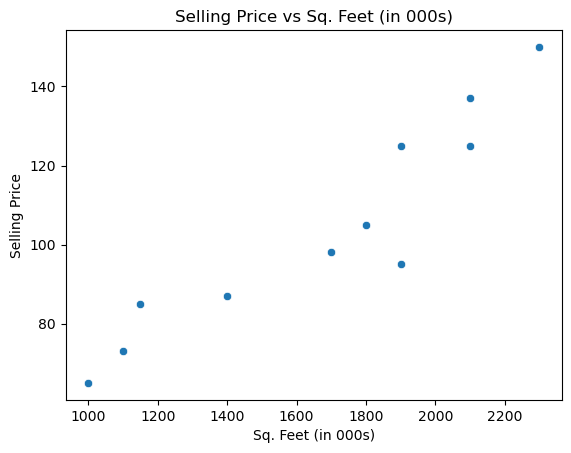

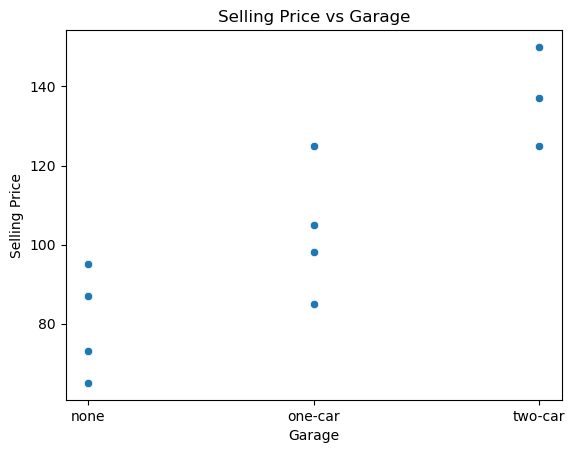

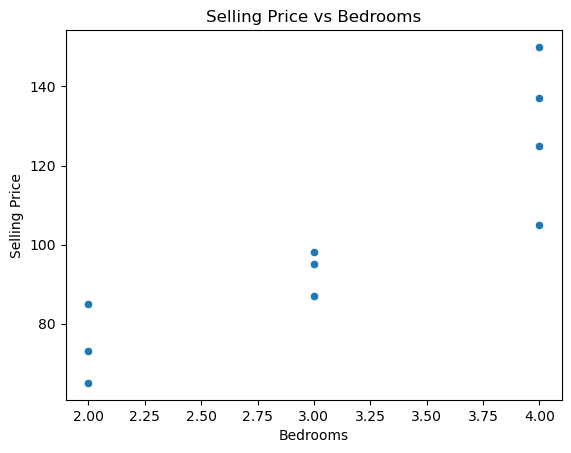

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatterplots for each attribute against selling price
attributes = df.columns.tolist()
print(attributes)
attributes.remove('Price (in $000s)')  
# Creation of scatterplot to visualize the data, comparing Selling price and the other attributes
for attribute in attributes:
    sns.scatterplot(x=attribute, y='Price (in $000s)', data=df)
    plt.title(f'Selling Price vs {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Selling Price')
    plt.show()


In [18]:
#
df['GarageQuantity'] = df['Garage'].map({'none': 0, 'one-car': 1, 'two-car': 2})
df.drop(columns=['Garage'], inplace=True)
print(df.head(24))


    Sq. Feet (in 000s)  Bedrooms  Price (in $000s)  GarageQuantity
0                 1000         2                65               0
1                 1100         2                73               0
2                 1150         2                85               1
3                 1400         3                87               0
4                 1700         3                98               1
5                 1800         4               105               1
6                 1900         3                95               0
7                 1900         4               125               1
8                 2100         4               125               2
9                 2100         4               137               2
10                2300         4               150               2


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the independent variable (X) and the dependent variable (y)
X = df.drop(columns=['Price (in $000s)'])  # Independent variables
y = df['Price (in $000s)']  # Dependent variable

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())
r_squared = model.rsquared

# Print the coefficient of determination (R^2)
print("Coefficient of Determination (R^2):", r_squared)


                            OLS Regression Results                            
Dep. Variable:       Price (in $000s)   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     38.26
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           0.000104
Time:                        07:47:03   Log-Likelihood:                -35.664
No. Observations:                  11   AIC:                             79.33
Df Residuals:                       7   BIC:                             80.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 26.4404     11

c:\Users\Leonardo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
# Add a constant to the existing DataFrame
X_with_const = sm.add_constant(X)
predictions = model.predict(X_with_const)
print(predictions)

# Values should print out the future selling prices of the houses 


0      66.395695
1      69.476036
2      83.583657
3      83.293017
4     105.101489
5     112.757790
6      98.694719
7     115.838130
8     134.566262
9     134.566262
10    140.726943
dtype: float64
